<a href="https://colab.research.google.com/github/Shawn1yu/2020-2024-layoff_data_visualization/blob/main/Layoff_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install basemap

In [2]:
!pip install squarify

  Using cached squarify-0.4.4-py3-none-any.whl.metadata (600 bytes)
Using cached squarify-0.4.4-py3-none-any.whl (4.1 kB)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from mpl_toolkits.basemap import Basemap
import os
import warnings
warnings.filterwarnings("ignore")

from google.colab import files
uploaded = files.upload()

Saving layoffs_data.csv to layoffs_data.csv


In [4]:
df = pd.read_csv('layoffs_data.csv')

In [5]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown


In [6]:
df.tail()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
3637,Service,Los Angeles,Travel,NaN,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,1.00,Unknown
3638,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,0.10,Unknown
3639,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,0.75,Unknown
3640,Tamara Mellon,Los Angeles,Retail,20.0,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,0.40,Unknown
3641,EasyPost,Salt Lake City,Logistics,75.0,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,NaN,Unknown


In [7]:
df.shape

(3642, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3642 non-null   object 
 1   Location_HQ                 3642 non-null   object 
 2   Industry                    3642 non-null   object 
 3   Laid_Off_Count              2389 non-null   float64
 4   Date                        3642 non-null   object 
 5   Source                      3642 non-null   object 
 6   Funds_Raised                3252 non-null   float64
 7   Stage                       3642 non-null   object 
 8   Date_Added                  3642 non-null   object 
 9   Country                     3642 non-null   object 
 10  Percentage                  2342 non-null   float64
 11  List_of_Employees_Laid_Off  3642 non-null   object 
dtypes: float64(3), object(9)
memory usage: 341.6+ KB


In [9]:
df.describe()

,Laid_Off_Count,Funds_Raised,Percentage
count,2389.000000,3252.000000,2342.000000
mean,257.926329,798.569494,0.281216
std,829.432277,4758.393161,0.287294
min,3.000000,0.000000,0.000000
25%,40.000000,51.000000,0.100000
50%,80.000000,166.000000,0.170000
75%,181.000000,469.250000,0.300000
max,14000.000000,121900.000000,1.000000


In [10]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,3642,2596,Google,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_HQ,3642,240,SF Bay Area,905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,3642,31,Finance,451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Laid_Off_Count,2389.0,NaN,NaN,NaN,257.926329,829.432277,3.0,40.0,80.0,181.0,14000.0
Date,3642,825,2020-04-02,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,3642,3407,Internal memo,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funds_Raised,3252.0,NaN,NaN,NaN,798.569494,4758.393161,0.0,51.0,166.0,469.25,121900.0
Stage,3642,16,Post-IPO,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_Added,3642,3603,2020-03-28 20:52:49,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,3642,63,United States,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

,0
Company,0
Location_HQ,0
Industry,0
Laid_Off_Count,1253
Date,0
Source,0
Funds_Raised,390
Stage,0
Date_Added,0
Country,0


In [12]:
df['Laid_Off_Count'] = df['Laid_Off_Count'].replace(np.NAN, 0)
df['Funds_Raised'] = df['Funds_Raised'].replace(np.NAN, 0)
df['Percentage'] = df['Percentage'].replace(np.NAN, 0)
df.isnull().sum()

,0
Company,0
Location_HQ,0
Industry,0
Laid_Off_Count,0
Date,0
Source,0
Funds_Raised,0
Stage,0
Date_Added,0
Country,0


In [13]:
df.duplicated().sum()

0

In [14]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['quarter'] = df['Date'].dt.to_period('Q')
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,Year,Month,quarter
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,0.00,Unknown,2024,June,2024Q2
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown,2024,June,2024Q2
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown,2024,June,2024Q2
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown,2024,June,2024Q2
4,Yext,New York City,Marketing,0.0,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown,2024,June,2024Q2


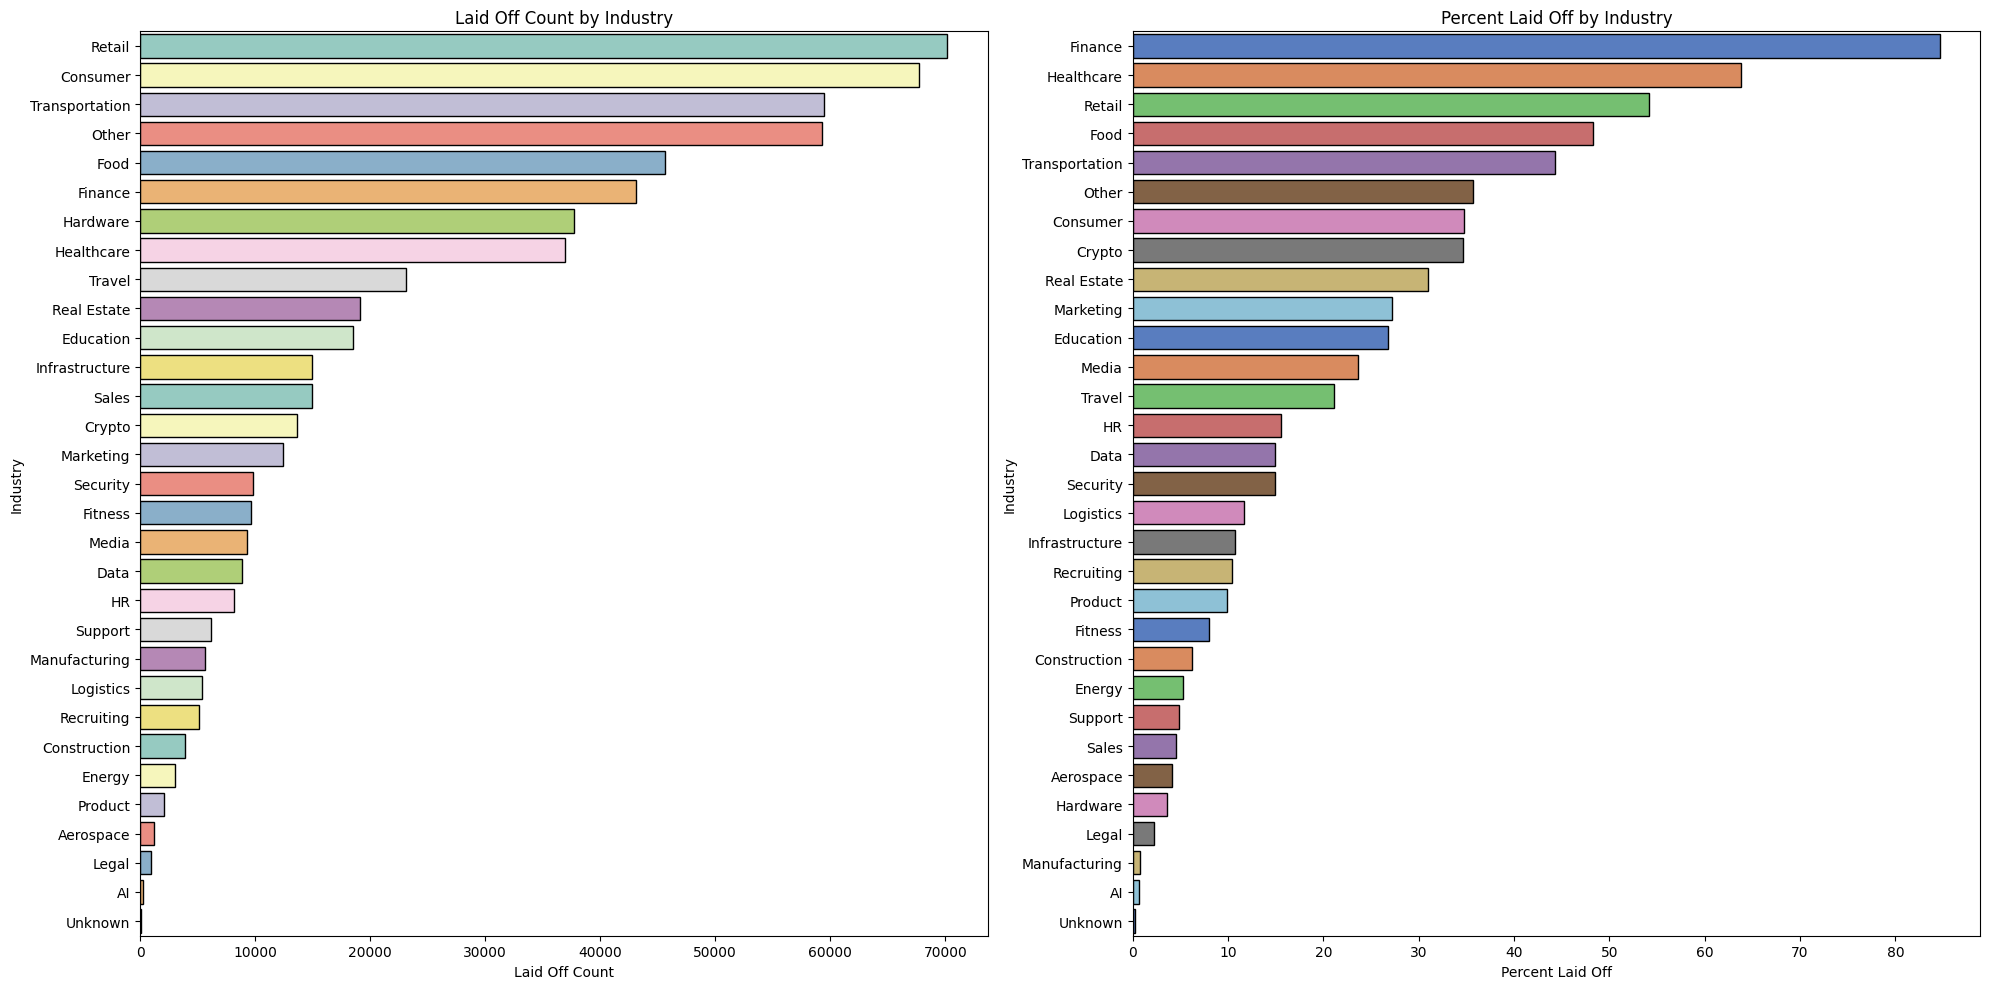

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

sns.barplot(
    data=df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index(),
    y='Industry', x='Laid_Off_Count', edgecolor='black', palette='Set3', ax=axs[0]
)
axs[0].set_title('Laid Off Count by Industry')
axs[0].set_xlabel('Laid Off Count')

sns.barplot(
    data=df.groupby('Industry')['Percentage'].sum().sort_values(ascending=False).reset_index(),
    y='Industry', x='Percentage', edgecolor='black', palette='muted', ax=axs[1]
)
axs[1].set_title('Percent Laid Off by Industry')
axs[1].set_xlabel('Percent Laid Off')

plt.tight_layout()
plt.show()

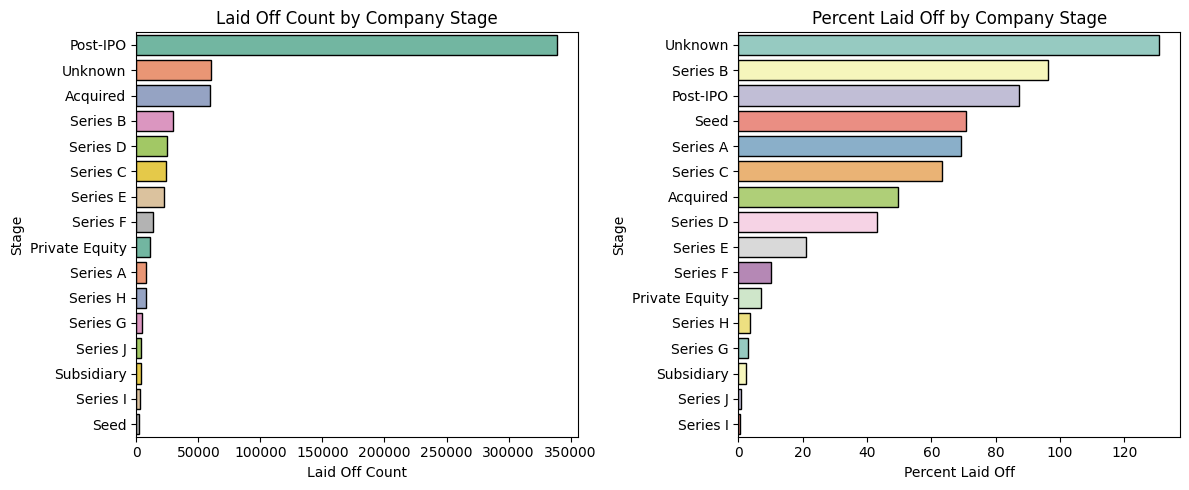

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.barplot(
    data=df.groupby('Stage')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index(),
    y='Stage', x='Laid_Off_Count', edgecolor='black', palette='Set2', ax=axs[0]
)
axs[0].set_title('Laid Off Count by Company Stage')
axs[0].set_xlabel('Laid Off Count')

sns.barplot(
    data=df.groupby('Stage')['Percentage'].sum().sort_values(ascending=False).reset_index(),
    y='Stage', x='Percentage', edgecolor='black', palette='Set3', ax=axs[1]
)
axs[1].set_title('Percent Laid Off by Company Stage')
axs[1].set_xlabel('Percent Laid Off')

plt.tight_layout()
plt.show()

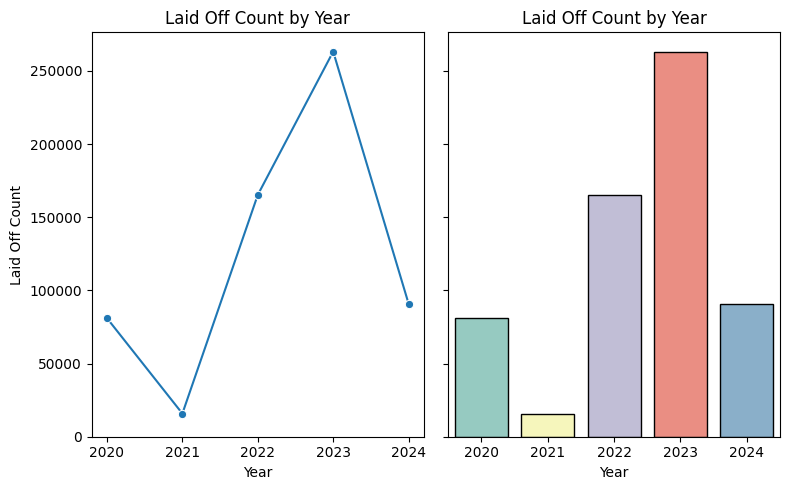

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 5))

sns.lineplot(
    data=df.groupby('Year')['Laid_Off_Count'].sum().reset_index(),
    x='Year', y='Laid_Off_Count', marker='o', ax=axs[0]
)
axs[0].set_title('Laid Off Count by Year')
axs[0].set_ylabel('Laid Off Count')

sns.barplot(
    data=df.groupby('Year')['Laid_Off_Count'].sum().reset_index(),
    x='Year', y='Laid_Off_Count', palette='Set3', linewidth=1, edgecolor='black', ax=axs[1]
)
axs[1].set_title('Laid Off Count by Year')
axs[1].set_ylabel('Laid Off Count')

plt.tight_layout()
plt.show()

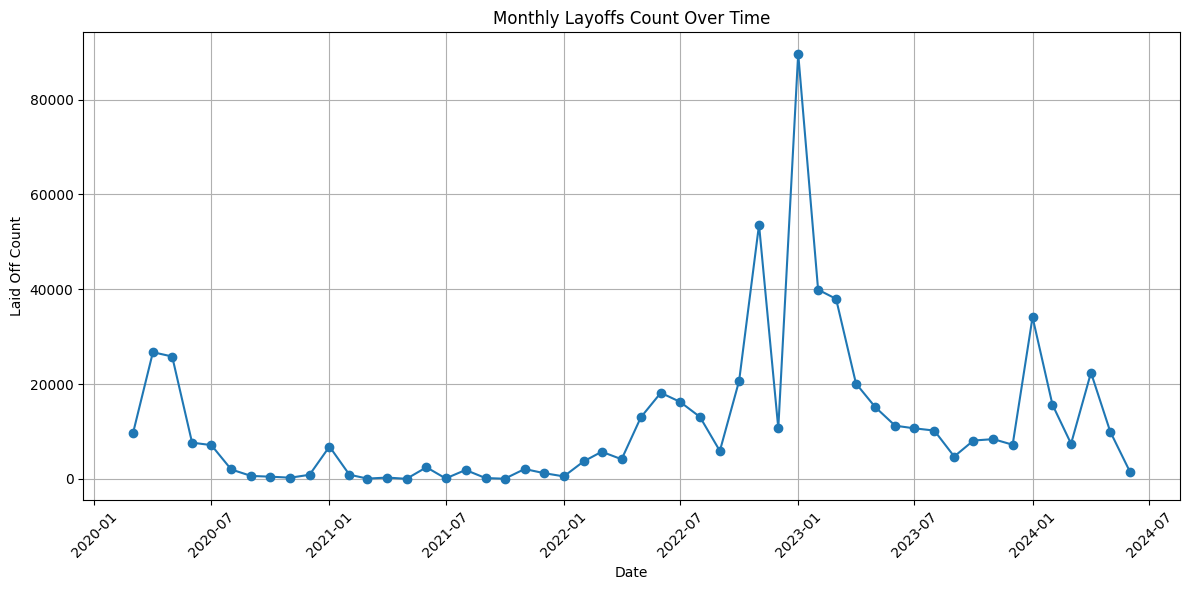

In [38]:
monthly_data = df.groupby(df['Date'].dt.to_period('M'))['Laid_Off_Count'].sum().reset_index()
monthly_data['Date'] = monthly_data['Date'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_data['Date'], monthly_data['Laid_Off_Count'], marker='o', linestyle='-')
ax.set_title('Monthly Layoffs Count Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Laid Off Count')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

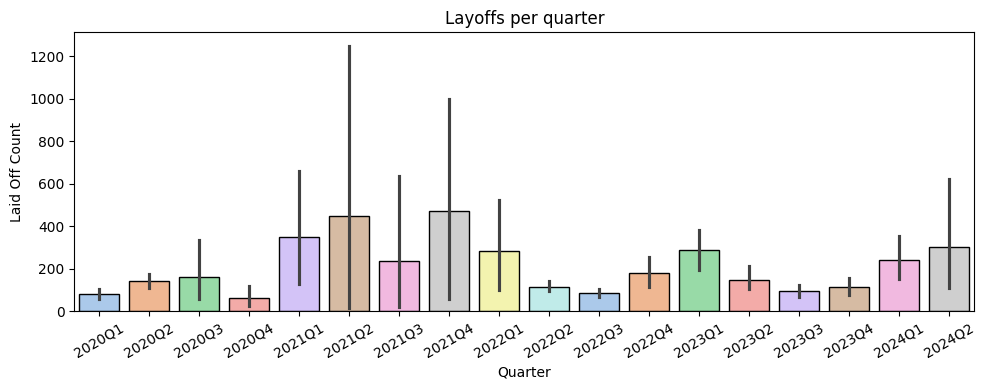

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.barplot(
    data=df.sort_values(by='quarter'),
    x='quarter', y='Laid_Off_Count',
    linewidth=1, edgecolor='black', palette='pastel', ax=ax
)

ax.set_title('Layoffs per quarter')
ax.set_ylabel('Laid Off Count')
ax.set_xlabel('Quarter')

ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

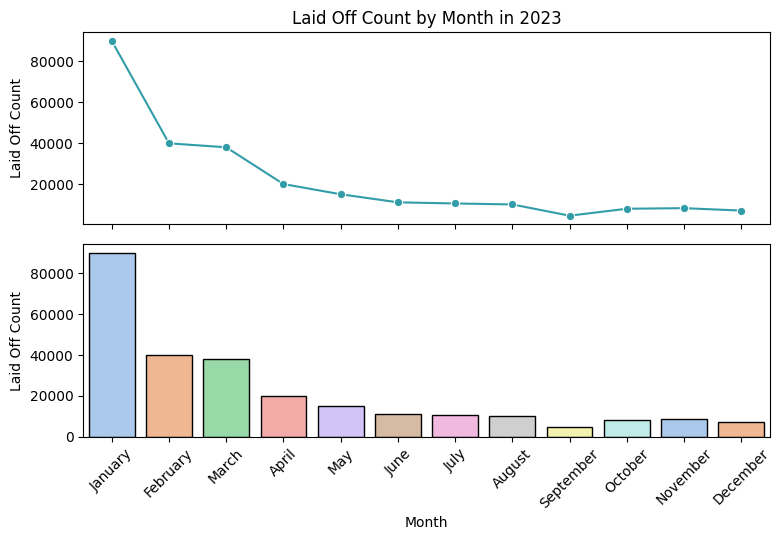

In [39]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_2023 = df[df['Year'] == 2023]

monthly_data_2023 = df_2023.groupby('Month')['Laid_Off_Count'].sum().reindex(month_order).reset_index()

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 5))

sns.lineplot(data=monthly_data_2023, x='Month', y='Laid_Off_Count', marker='o', ax=axs[0], color='#329da8')
axs[0].set_title('Laid Off Count by Month in 2023')
axs[0].set_ylabel('Laid Off Count')

sns.barplot(data=monthly_data_2023, x='Month', y='Laid_Off_Count', palette='pastel', linewidth=1, edgecolor='black', ax=axs[1])
axs[1].set_ylabel('Laid Off Count')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

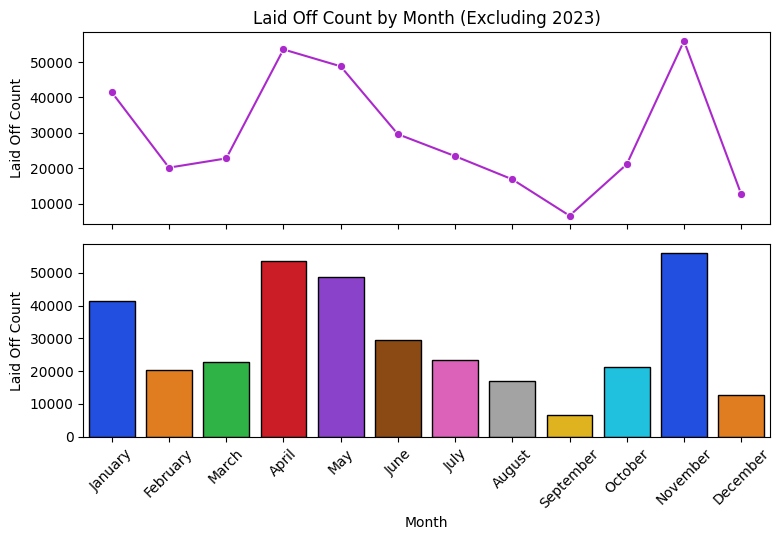

In [45]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_data_ex_2023 = df.query("Year != 2023").groupby('Month')['Laid_Off_Count'].sum().reindex(month_order).reset_index()

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 5))

sns.lineplot(data=monthly_data_ex_2023, x='Month', y='Laid_Off_Count', marker='o', ax=axs[0], color='#ab29cc')
axs[0].set_title('Laid Off Count by Month (Excluding 2023)')
axs[0].set_ylabel('Laid Off Count')

sns.barplot(data=monthly_data_ex_2023, x='Month', y='Laid_Off_Count', palette='bright', linewidth=1, edgecolor='black', ax=axs[1])
axs[1].set_ylabel('Laid Off Count')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

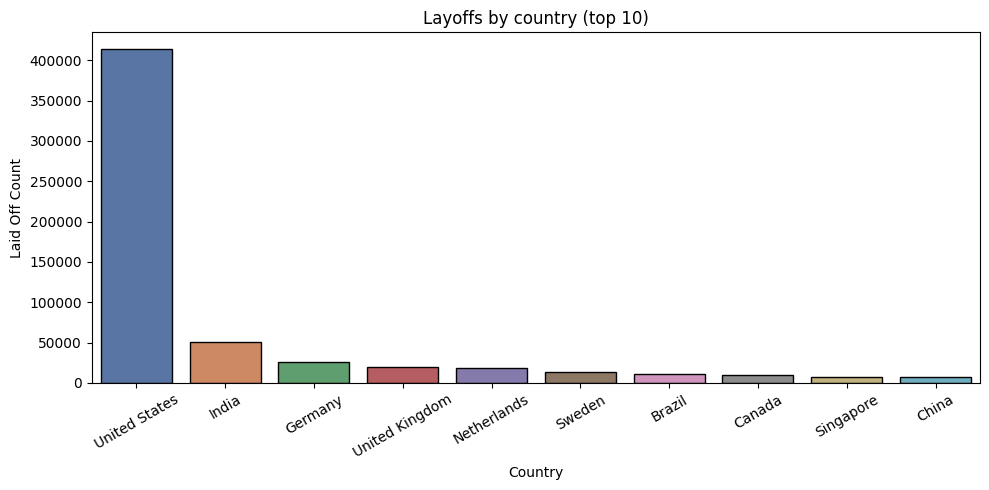

In [46]:
top_10_countries = df.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10)

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    data=top_10_countries,
    x='Country', y='Laid_Off_Count',
    linewidth=1, edgecolor='black', palette='deep', ax=ax
)

ax.set_title('Layoffs by country (top 10)')
ax.set_ylabel('Laid Off Count')

plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

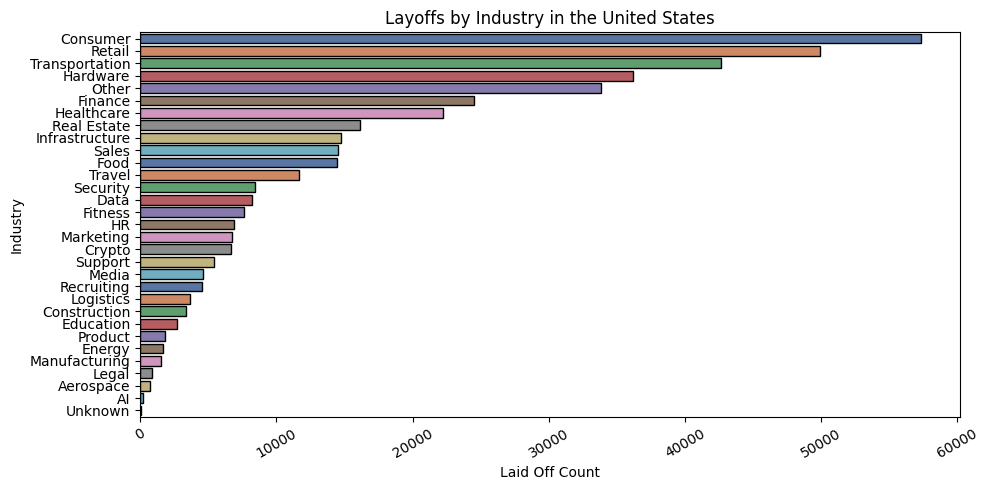

In [47]:
df_usa = df[df['Country'] == 'United States']

industry_usa = df_usa.groupby('Industry')['Laid_Off_Count'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    data=industry_usa.sort_values(by='Laid_Off_Count', ascending=False),
    x='Laid_Off_Count', y='Industry',
    linewidth=1, edgecolor='black', palette='deep', ax=ax
)

ax.set_title('Layoffs by Industry in United States')
ax.set_xlabel('Laid Off Count')
ax.set_ylabel('Industry')

plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

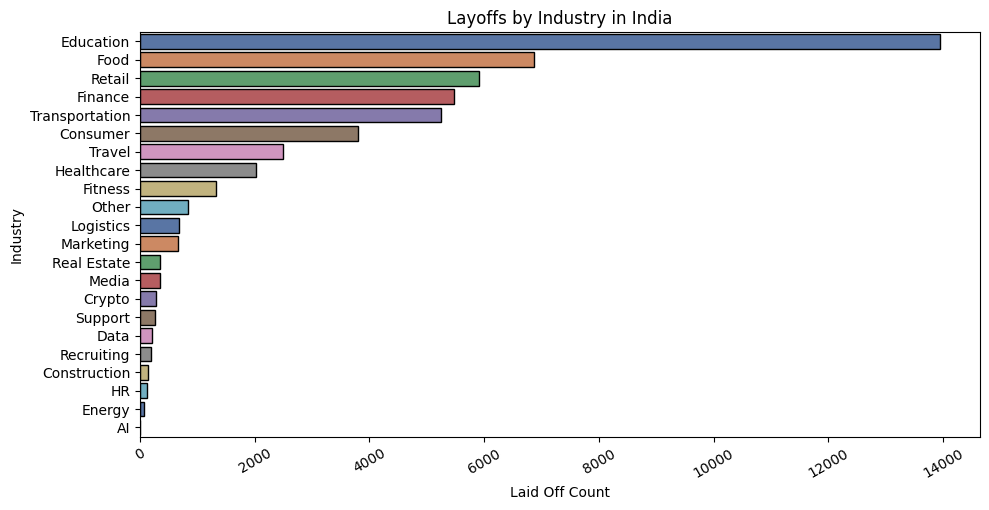

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

df_usa = df[df['Country'] == 'India']

industry_usa = df_usa.groupby('Industry')['Laid_Off_Count'].sum().reset_index()

ax = sns.barplot(data=industry_usa.sort_values(by='Laid_Off_Count', ascending=False), x='Laid_Off_Count', y='Industry',
                 linewidth=1, edgecolor='black', palette='deep')
ax.set(title='Layoffs by Industry in India', xlabel='Laid Off Count', ylabel='Industry')

plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

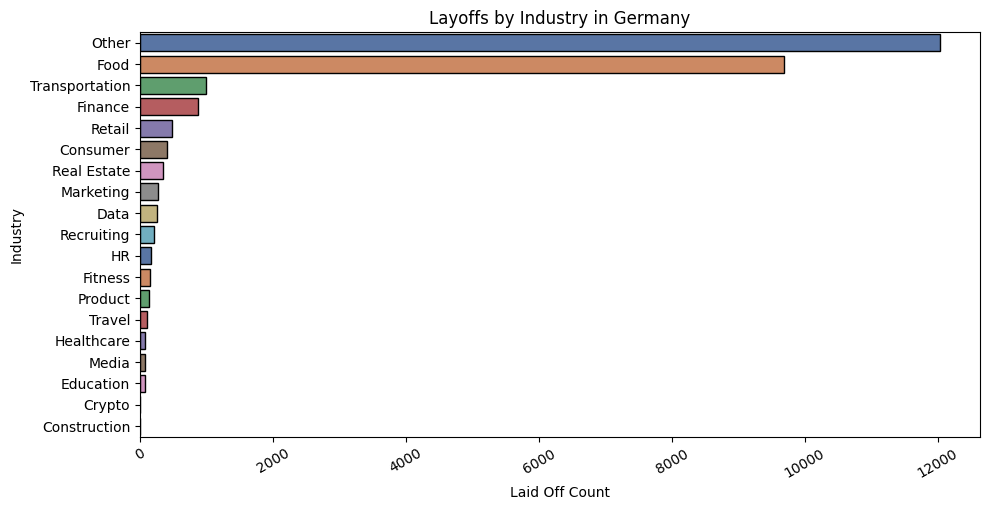

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))

df_usa = df[df['Country'] == 'Germany']

industry_usa = df_usa.groupby('Industry')['Laid_Off_Count'].sum().reset_index()

ax = sns.barplot(data=industry_usa.sort_values(by='Laid_Off_Count', ascending=False), x='Laid_Off_Count', y='Industry',
                 linewidth=1, edgecolor='black', palette='deep')
ax.set(title='Layoffs by Industry in Germany', xlabel='Laid Off Count', ylabel='Industry')

plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

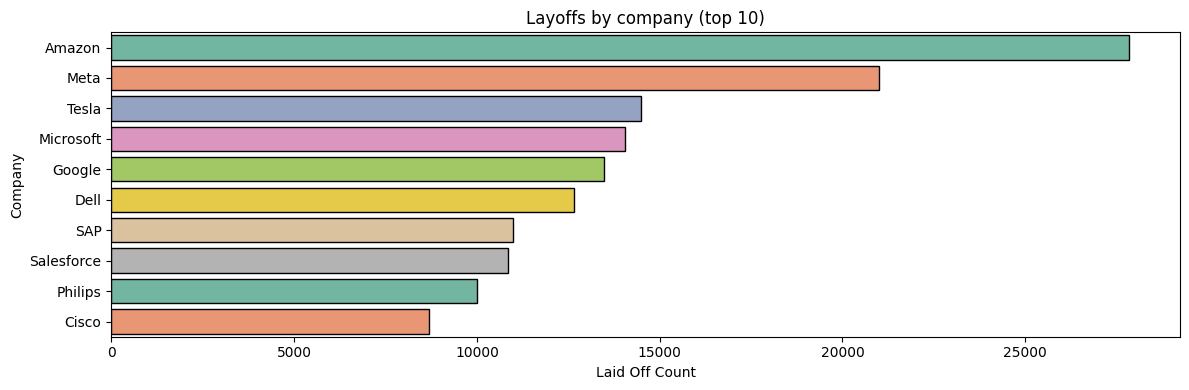

In [50]:
top_10_companies = df.groupby('Company')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10)

fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(
    data=top_10_companies,
    x='Laid_Off_Count', y='Company',
    linewidth=1, edgecolor='black', palette='Set2', ax=ax
)

ax.set_title('Layoffs by company (top 10)')
ax.set_xlabel('Laid Off Count')
ax.set_ylabel('Company')

plt.tight_layout()
plt.show()

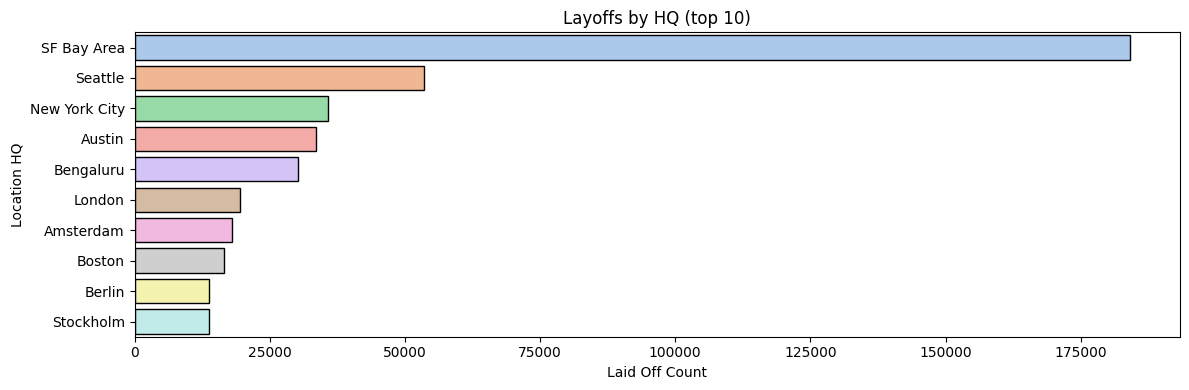

In [51]:
top_10_hq = df.groupby('Location_HQ')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10)

fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(
    data=top_10_hq,
    x='Laid_Off_Count', y='Location_HQ',
    linewidth=1, edgecolor='black', palette='pastel', ax=ax
)

ax.set_title('Layoffs by HQ (top 10)')
ax.set_xlabel('Laid Off Count')
ax.set_ylabel('Location HQ')

plt.tight_layout()
plt.show()

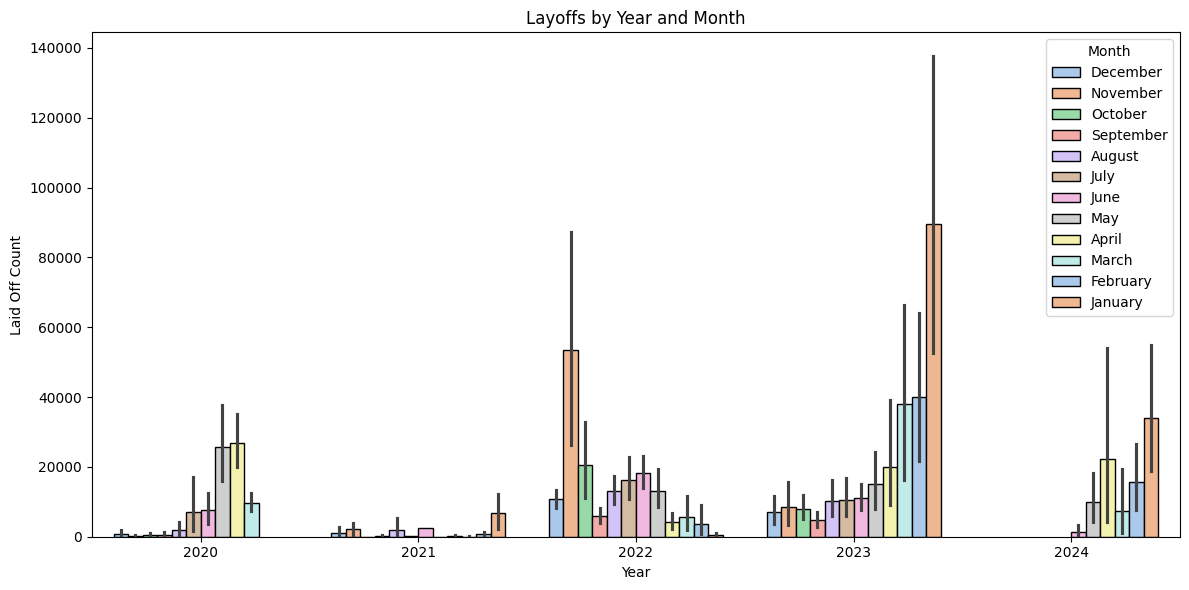

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(
    data=df,
    x='Year', y='Laid_Off_Count', hue='Month',
    estimator=sum, edgecolor='black', palette='pastel', ax=ax
)

ax.set_title('Layoffs by Year and Month')
ax.set_ylabel('Laid Off Count')

plt.tight_layout()
plt.show()

In [54]:
import plotly.express as px

world = df.groupby("Country")["Laid_Off_Count"].sum().reset_index()

figure = px.choropleth(
    world,
    locations="Country",
    locationmode="country names",
    color="Laid_Off_Count",
    hover_name="Country",
    range_color=[1, 10000],
    color_continuous_scale="reds",
    title="Countries having LayOffs"
)

figure.show()

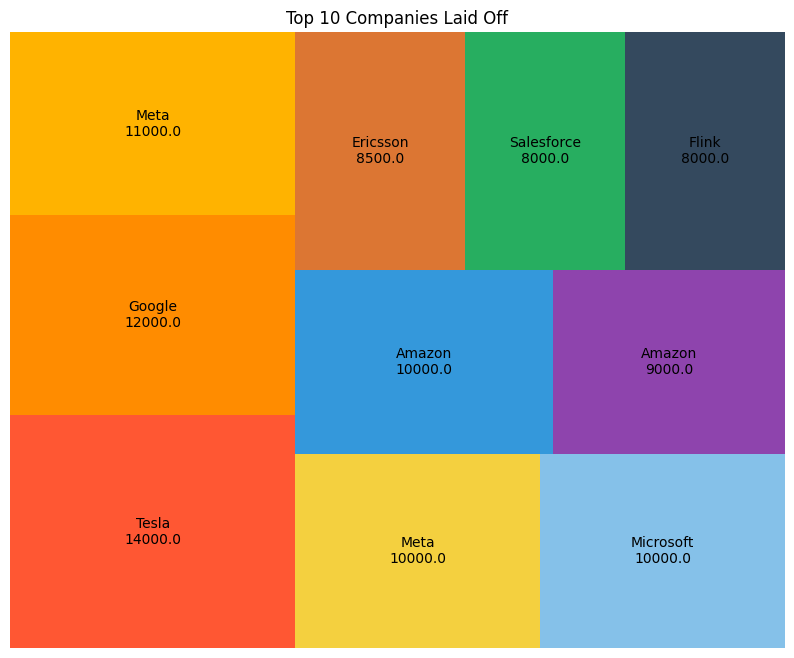

In [55]:
sorted_df = df.sort_values('Laid_Off_Count', ascending=False).head(10)
Companies = sorted_df["Company"].tolist()
Laid_off_count = sorted_df['Laid_Off_Count'].tolist()

colors = ['#FF5733', '#FF8C00', '#FFB300', '#F4D03F', '#85C1E9', '#3498DB', '#8E44AD', '#DC7633', '#27AE60', '#34495E']
sizes = [count / sum(Laid_off_count) for count in Laid_off_count]
labels = [f'{company}\n{laid_off_count}' for company, laid_off_count in zip(Companies, Laid_off_count)]

plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, color=colors)
plt.title('Top 10 Companies Laid Off')
plt.axis('off')
plt.show()

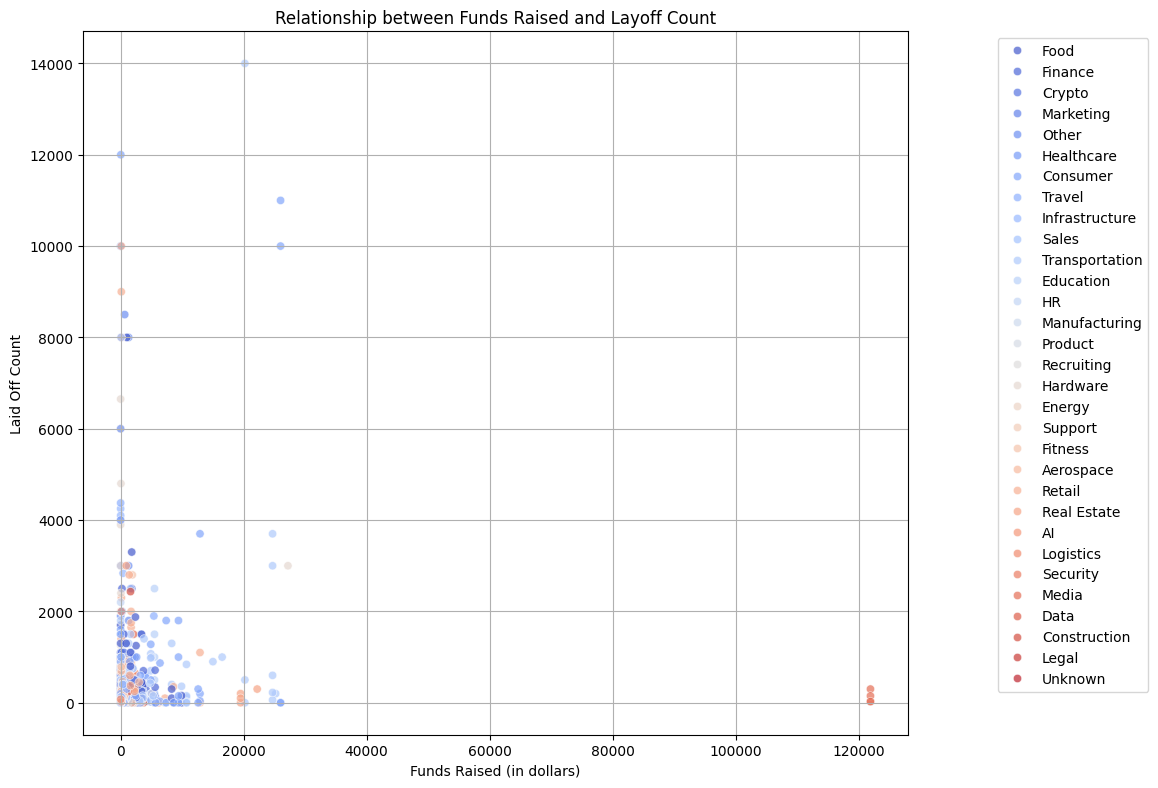

In [56]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(
    data=df,
    x='Funds_Raised', y='Laid_Off_Count',
    hue='Industry', palette='coolwarm', edgecolor='w', alpha=0.7, ax=ax
)

ax.set_title('Relationship between Funds Raised and Layoff Count')
ax.set_xlabel('Funds Raised (in dollars)')
ax.set_ylabel('Laid Off Count')

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.grid(True)
plt.show()

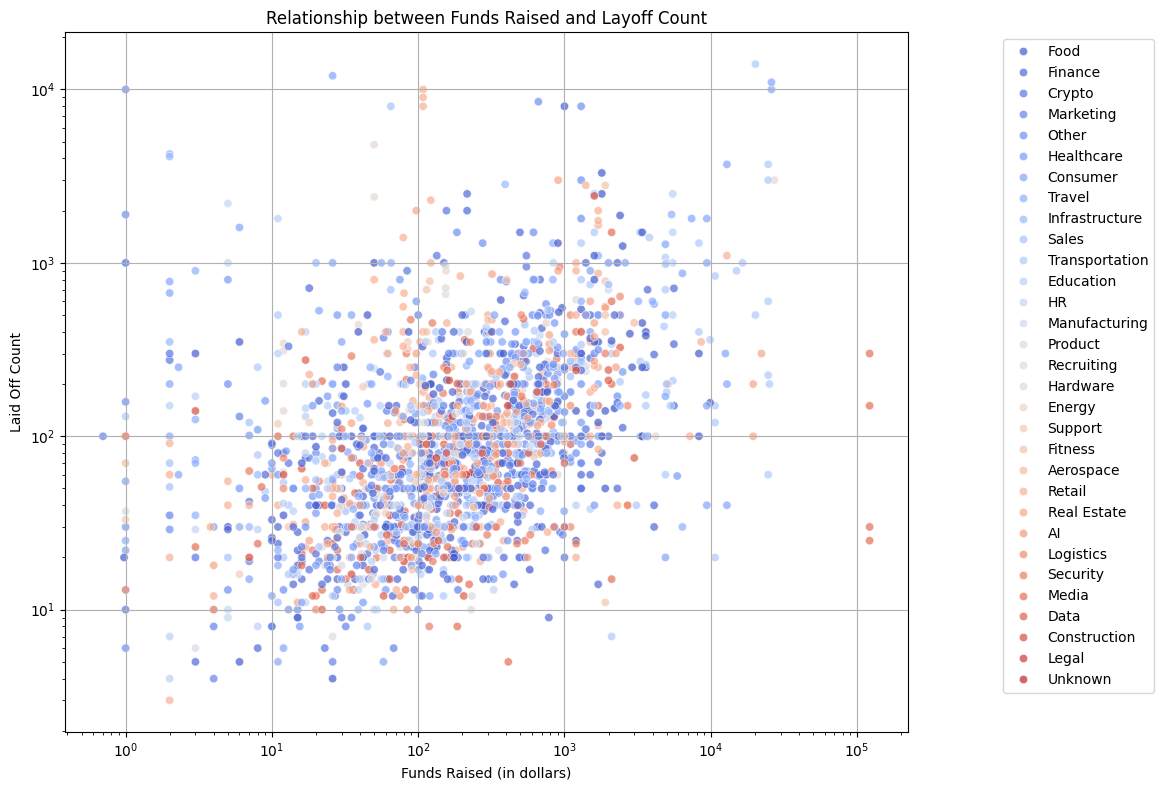

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(
    data=df,
    x='Funds_Raised', y='Laid_Off_Count',
    hue='Industry', palette='coolwarm', edgecolor='w', alpha=0.7, ax=ax
)

ax.set_title('Relationship between Funds Raised and Layoff Count')
ax.set_xlabel('Funds Raised (in dollars)')
ax.set_ylabel('Laid Off Count')

ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.grid(True)
plt.show()

In [58]:
high_funding_threshold = df['Funds_Raised'].quantile(0.75)
high_layoff_threshold = df['Laid_Off_Count'].quantile(0.75)

high_funding_high_layoff = df[(df['Funds_Raised'] >= high_funding_threshold) & (df['Laid_Off_Count'] >= high_layoff_threshold)]

high_funding_high_layoff_info = high_funding_high_layoff[['Company', 'Industry', 'Funds_Raised', 'Laid_Off_Count']]

high_funding_high_layoff_info

,Company,Industry,Funds_Raised,Laid_Off_Count
0,Oda,Food,691.0,150.0
16,Lucid Motors,Transportation,8300.0,400.0
18,Guild,Education,643.0,300.0
19,Cue Health,Healthcare,899.0,180.0
33,Rivian,Transportation,10700.0,120.0
...,...,...,...,...
3557,Bird,Transportation,623.0,406.0
3560,DataRobot,Data,430.0,200.0
3563,Knotel,Real Estate,560.0,127.0
3588,TripActions,Travel,981.0,300.0


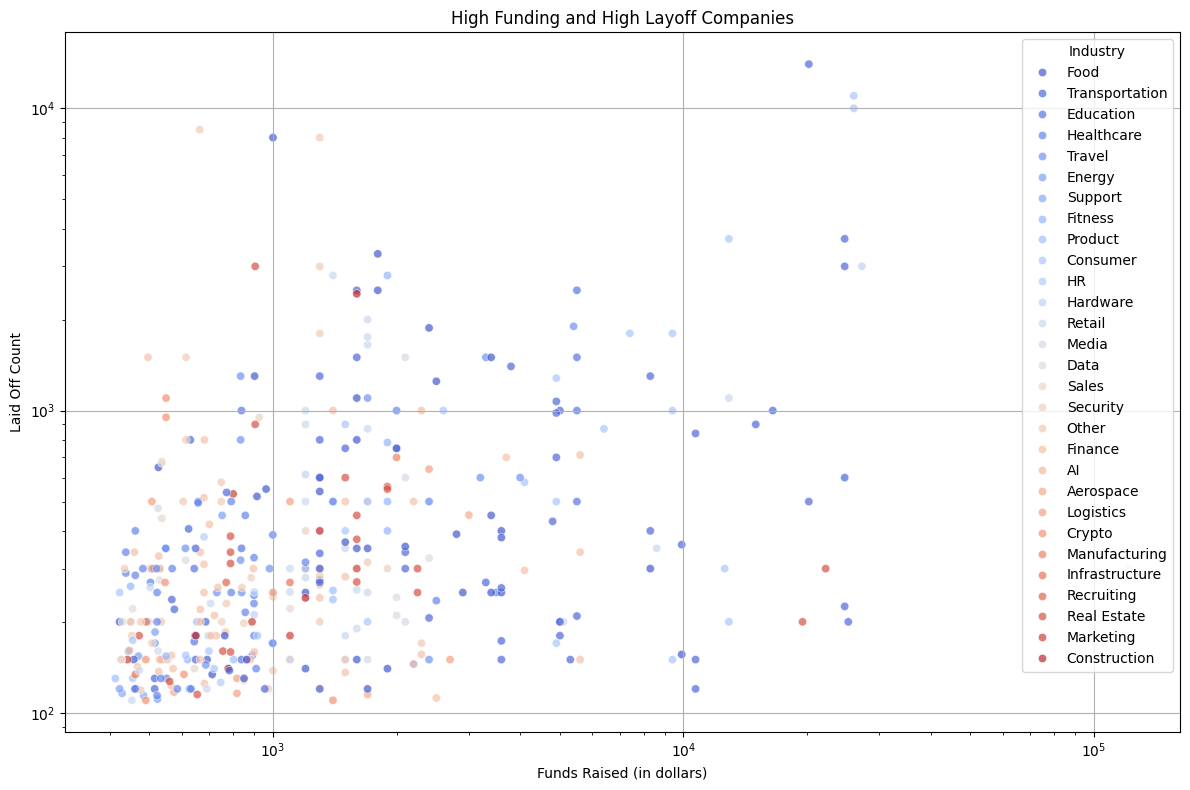

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(
    data=high_funding_high_layoff,
    x='Funds_Raised', y='Laid_Off_Count',
    hue='Industry', palette='coolwarm', edgecolor='w', alpha=0.7, ax=ax
)

ax.set_title('High Funding and High Layoff Companies')
ax.set_xlabel('Funds Raised (in dollars)')
ax.set_ylabel('Laid Off Count')

ax.set_xscale('log')
ax.set_yscale('log')

plt.grid(True)
plt.tight_layout()
plt.show()